<a href="https://colab.research.google.com/github/Blackan06/DataSciene-Demo-2024/blob/main/CIFAR_10_Data_with_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import necessary libraries:

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
!pip install keras-tuner
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization, Activation,Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam , SGD, RMSprop
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import LearningRateScheduler
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


#Loading and Processing CIFAR-10 Data from Batch Files on Kaggle

*   Mục danh sách
*   Mục danh sách



In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


#Normalize the training and test data

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#Convert the training and test labels to one-hot encoding.

In [ ]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

#Grid of Random CIFAR-10 Images with Labels

<ipython-input-6-5f6a35629d98>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


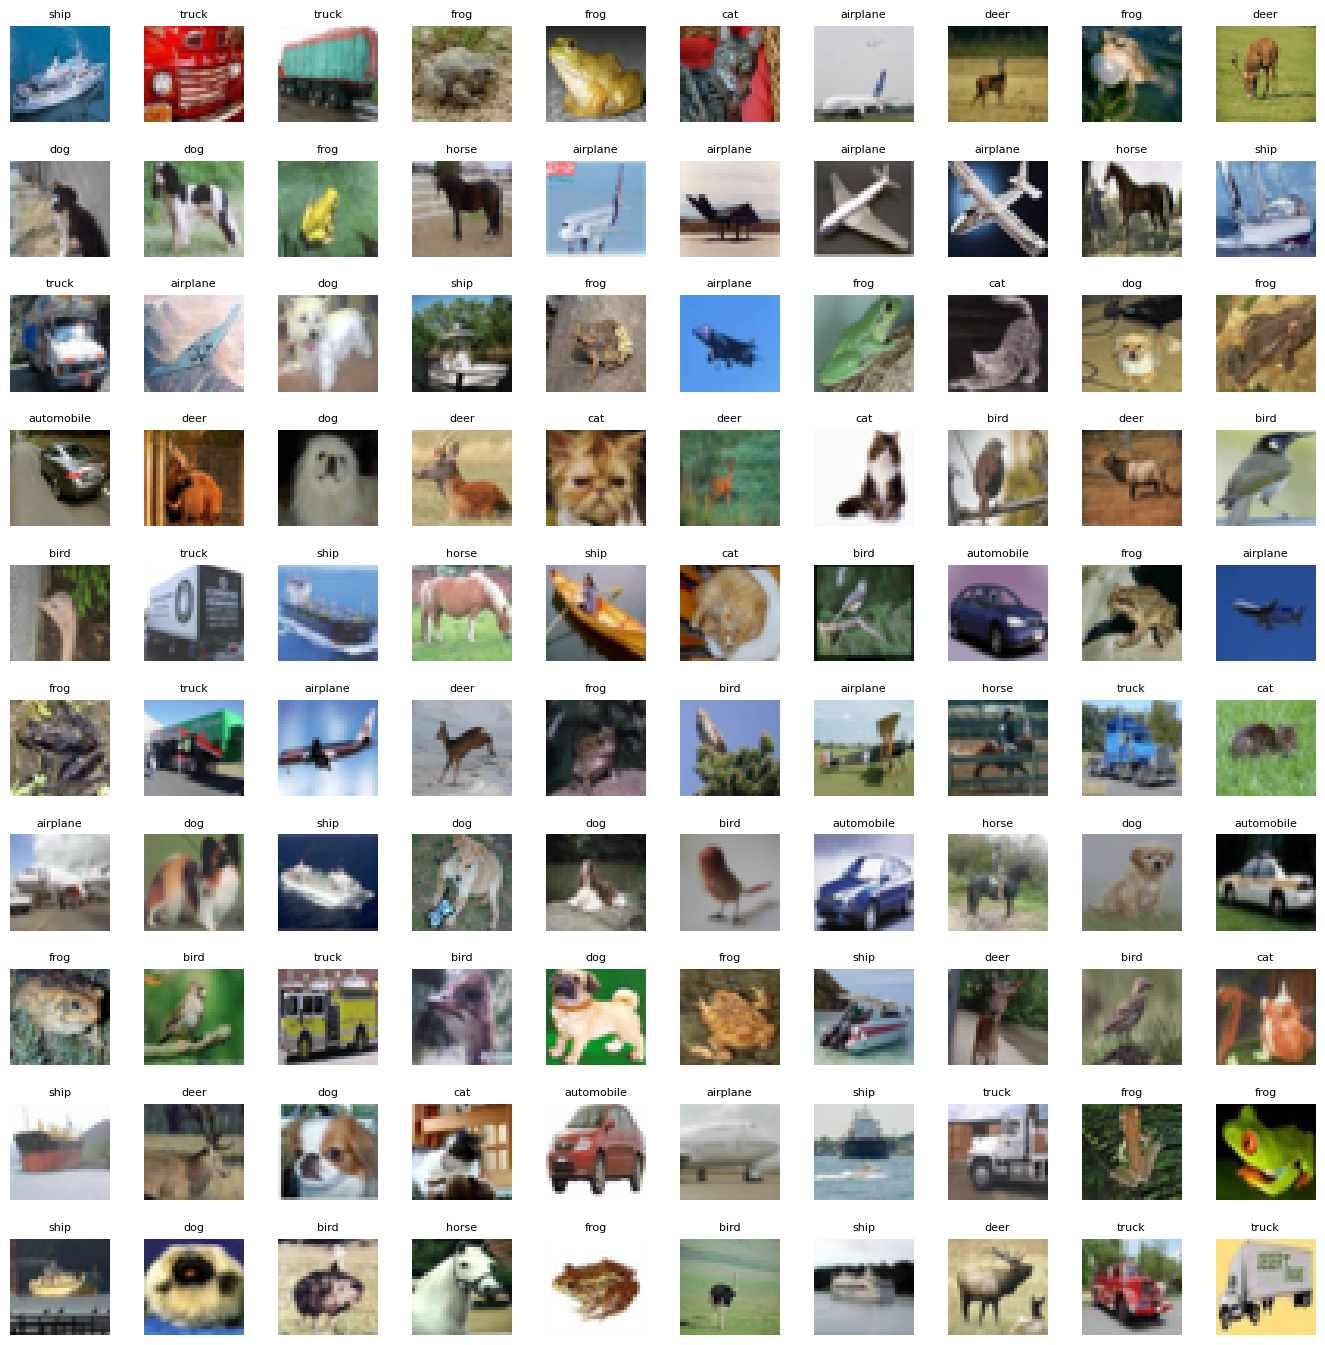

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

#Building and Compiling an AlexNet Model for Image Classification

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))  # Sử dụng lớp Input để xác định đầu vào
    model.add(Conv2D(96, (3, 3), strides=(4, 4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

alexnet = create_alexnet()
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training the AlexNet Model on CIFAR-10 Dataset with Validation

In [ ]:
history_alexnet = alexnet.fit(x_train, y_cat_train, epochs=100, batch_size=64, validation_data=(x_test, y_cat_test))

Epoch 1/100
 11/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0956 - loss: 2.3060  

I0000 00:00:1723773666.397871     175 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723773666.422854     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1875 - loss: 2.0289

W0000 00:00:1723773680.433983     173 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.1875 - loss: 2.0287 - val_accuracy: 0.3229 - val_loss: 1.7152
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3610 - loss: 1.6293 - val_accuracy: 0.4261 - val_loss: 1.5007
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4846 - loss: 1.3993 - val_accuracy: 0.5044 - val_loss: 1.3801
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5480 - loss: 1.2374 - val_accuracy: 0.5298 - val_loss: 1.3069
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5863 - loss: 1.1387 - val_accuracy: 0.5467 - val_loss: 1.2601
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6206 - loss: 1.0525 - val_accuracy: 0.5748 - val_loss: 1.2058
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6509 - loss: 0.9790 - val_accuracy: 0.5862 - val_loss: 1.2004
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6713 - loss: 0.9206 - val_accur

#Loading Pretrained VGG16 Model Weights for Feature Extraction

In [ ]:
weights_path = '/kaggle/input/vgg16m/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg16 = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

#Building and Compiling a Custom Model Using VGG16 for Image Classification

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the Custom VGG16-Based Model on CIFAR-10 with Validation

In [ ]:
# Train the model
history_vgg = model.fit(x_train, y_cat_train, epochs=100,
                    validation_data=(x_test, y_cat_test),
                    batch_size=64)

Epoch 1/100
  5/782 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.1062 - loss: 2.6409 

W0000 00:00:1723774647.302949     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0977 - loss: 2.3146

W0000 00:00:1723774680.371749     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 45ms/step - accuracy: 0.0977 - loss: 2.3146 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.0987 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.1002 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.1001 - loss: 2.3027 - val_

#Comparing Training and Validation Performance of AlexNet and VGG16 Models

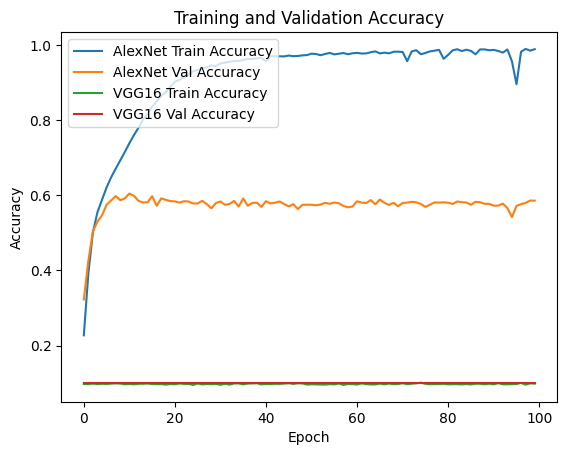

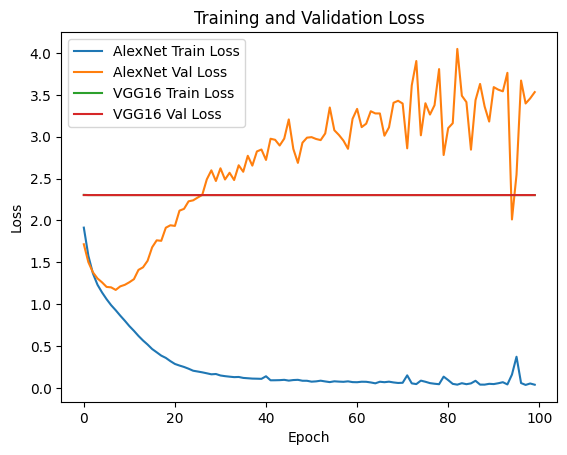

In [ ]:
plt.plot(history_alexnet.history['accuracy'], label='AlexNet Train Accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label='AlexNet Val Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG16 Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_alexnet.history['loss'], label='AlexNet Train Loss')
plt.plot(history_alexnet.history['val_loss'], label='AlexNet Val Loss')
plt.plot(history_vgg.history['loss'], label='VGG16 Train Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#AlexNet:
The AlexNet model demonstrated strong learning capabilities on the training set, achieving nearly 99% accuracy. However, its performance on the validation set was significantly lower, with accuracy hovering around 58-60% and a steadily increasing validation loss. This clear discrepancy indicates that the model is suffering from overfitting, where it has memorized the training data well but struggles to generalize to new, unseen data. To address this, techniques such as regularization, data augmentation, or further tuning of the model architecture should be considered.

#VGG16:
The VGG16 model, on the other hand, exhibited severe underfitting, as it failed to learn from the CIFAR-10 dataset effectively. Both training and validation accuracy remained stagnant at around 10%, which is equivalent to random guessing in a 10-class problem. This suggests that the model, in its current configuration, was unable to capture the necessary features to make meaningful predictions. Revisiting the model architecture, increasing training duration, or exploring alternative training strategies may be necessary to enhance its learning capabilities.

Before drawing conclusions and making a comparison between AlexNet and VGG16, I will first train both models to achieve their most stable and optimal performance.

#Enhanced AlexNet Model with Batch Normalization and Dropout for Image Classification

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization
    model.add(Conv2D(96, (3, 3), strides=(4, 4), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

alexnet = create_alexnet()
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_alexnet = alexnet.fit(x_train, y_cat_train, epochs=100, batch_size=64, validation_data=(x_test, y_cat_test))

Epoch 1/100
 11/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.1238 - loss: 5.2280

W0000 00:00:1723778040.498644     172 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3197 - loss: 1.9879

W0000 00:00:1723778056.702954     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3198 - loss: 1.9875 - val_accuracy: 0.4637 - val_loss: 1.5827
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5158 - loss: 1.3834 - val_accuracy: 0.4933 - val_loss: 1.6609
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5704 - loss: 1.2600 - val_accuracy: 0.4873 - val_loss: 1.5608
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6237 - loss: 1.1004 - val_accuracy: 0.5402 - val_loss: 1.3625
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6688 - loss: 0.9699 - val_accuracy: 0.5084 - val_loss: 1.4968
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6958 - loss: 0.9225 - val_accuracy: 0.5492 - val_loss: 1.5171
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7389 - loss: 0.7606 - val_accuracy: 0.5925 - val_loss: 1.2927
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7802 - loss: 0.6632 - val_

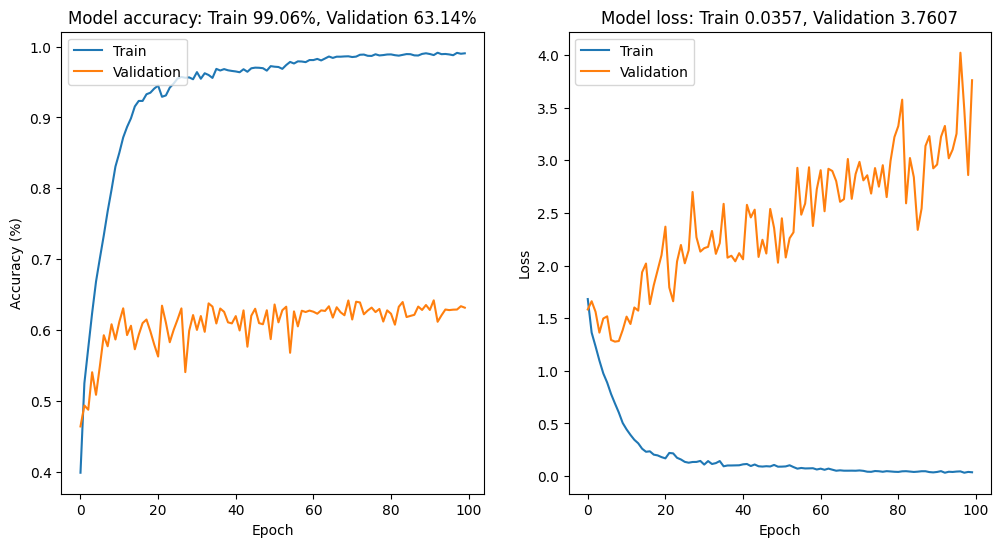

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

The enhanced AlexNet model achieved a high training accuracy of over 99% by the end of the 100 epochs, indicating strong learning capabilities on the training set. However, despite these impressive results, the validation accuracy plateaued around 63%, and the validation loss continued to increase, peaking at 3.7 by the final epoch. This significant gap between training and validation performance clearly indicates that the model is overfitting—learning the training data too well but failing to generalize effectively to unseen data.

Even with the integration of Batch Normalization and Dropout layers to stabilize training and reduce overfitting, the model’s generalization did not improve as expected.

#Added L2 Regularization (λ = 0.001) to AlexNet Model to Reduce Overfitting

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization and L2 Regularization
    model.add(Conv2D(96, (3, 3), strides=(4, 4), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

alexnet = create_alexnet()
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_alexnet = alexnet.fit(x_train, y_cat_train, epochs=100, batch_size=64, validation_data=(x_test, y_cat_test))

Epoch 1/100
 10/782 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.1196 - loss: 10.4033

W0000 00:00:1723779047.502867     172 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3182 - loss: 4.5838

W0000 00:00:1723779067.746413     173 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - accuracy: 0.3183 - loss: 4.5819 - val_accuracy: 0.4093 - val_loss: 2.2157
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4645 - loss: 1.9905 - val_accuracy: 0.4536 - val_loss: 2.0287
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5063 - loss: 1.8463 - val_accuracy: 0.4218 - val_loss: 2.0752
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5407 - loss: 1.7691 - val_accuracy: 0.4937 - val_loss: 1.8604
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5726 - loss: 1.6769 - val_accuracy: 0.4359 - val_loss: 2.0148
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5932 - loss: 1.6384 - val_accuracy: 0.5297 - val_loss: 1.7646
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6098 - loss: 1.5630 - val_accuracy: 0.5668 - val_loss: 1.6550
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6308 - loss: 1.5086 - val_

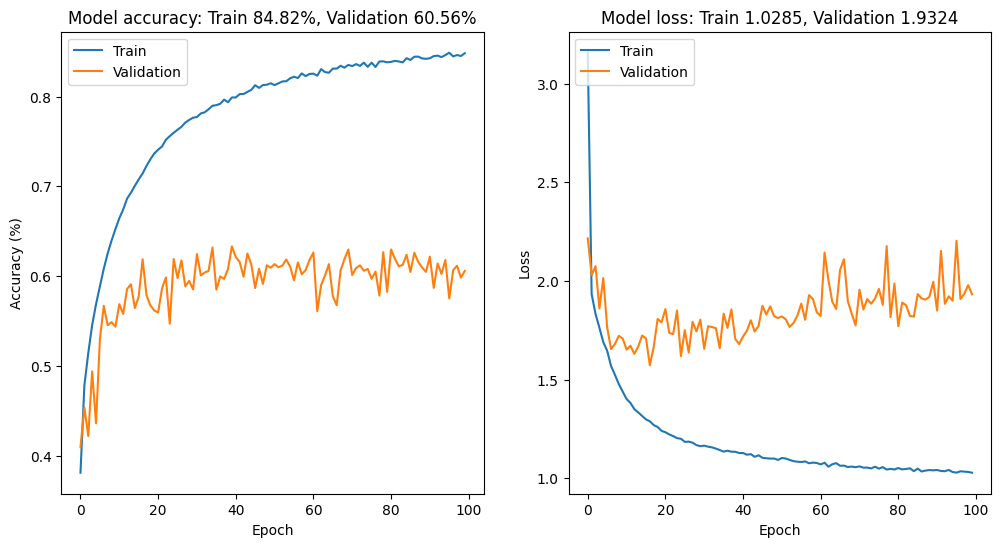

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

AlexNet model with L2 Regularization (with value
𝜆
=
0.001
λ=0.001) has helped improve the generalization ability of the model, shown by minimizing overfitting between the training set and the test set. However, even though L2 Regularization was applied, the model still encountered a certain overfitting situation, manifested by a significant difference between the accuracy on the training set and the test set. This suggests I need to continue to refine the hyperparameters or apply additional techniques. So I will try applying early stopping to prevent premature training when the model starts to overfit, to improve overall performance.

#Apply Early Stopping to Prevent Overfitting and Improve Performance of AlexNet Model

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization and L2 Regularization
    model.add(Conv2D(96, (3, 3), strides=(4, 4), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

# Create the AlexNet model
alexnet = create_alexnet()
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_alexnet = alexnet.fit(x_train, y_cat_train, epochs=100, batch_size=64, validation_data=(x_test, y_cat_test), callbacks=[early_stopping])

Epoch 1/100
  7/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.1374 - loss: 9.6617 

I0000 00:00:1723861826.057421     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723861826.081007     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3167 - loss: 4.5451

W0000 00:00:1723861844.778622     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723861846.683694     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.3167 - loss: 4.5433 - val_accuracy: 0.3584 - val_loss: 2.2829
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4735 - loss: 1.9679 - val_accuracy: 0.4562 - val_loss: 1.9593
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5119 - loss: 1.8356 - val_accuracy: 0.4311 - val_loss: 2.0452
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5465 - loss: 1.7594 - val_accuracy: 0.5444 - val_loss: 1.7167
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5652 - loss: 1.6737 - val_accuracy: 0.4938 - val_loss: 1.8708
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5991 - loss: 1.5870 - val_accuracy: 0.4509 - val_loss: 2.0628
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6164 - loss: 1.5227 - val_accuracy: 0.4955 - val_loss: 1.9420
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6330 - loss: 1.4649 - val_

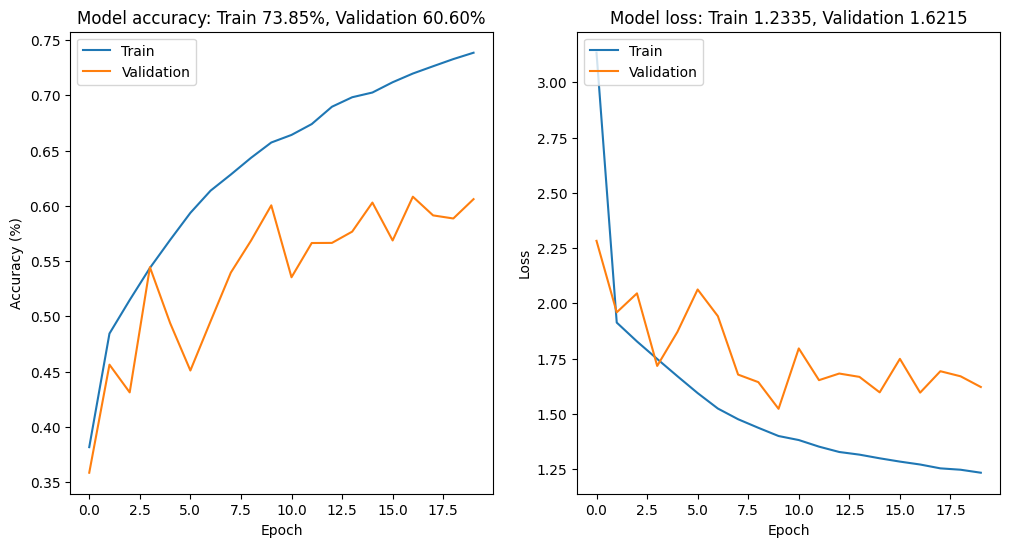

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

After the training process, the AlexNet model had a significant improvement in generalization ability, shown by the reduction of overfitting between the training set and the test set. Specifically, after 20 epochs, the accuracy on the training set reached 74.97%, while the accuracy on the test set reached 60.60%. Although there has been improvement, the difference of about 14.37% between the accuracy of the two sets still shows that overfitting still exists. To further improve the model's performance, I will apply Data Augmentation and Learning Rate Scheduling techniques.

#Applying Data Augmentation and Learning Rate Scheduling to Mitigate Overfitting in AlexNet

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization and L2 Regularization
    model.add(Conv2D(96, (3, 3), strides=(4, 4), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

# Create the AlexNet model
alexnet = create_alexnet()
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the model with data augmentation and callbacks
history_alexnet = alexnet.fit(
    datagen.flow(x_train, y_cat_train, batch_size=64),
    epochs=100,
    validation_data=(x_test, y_cat_test),
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100
  5/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.1457 - loss: 9.8494

W0000 00:00:1723839978.852989     337 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


248/782 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - accuracy: 0.2203 - loss: 6.3819

W0000 00:00:1723839993.137553     337 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.2734 - loss: 4.6348 - val_accuracy: 0.3270 - val_loss: 2.2533 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.3801 - loss: 2.0845 - val_accuracy: 0.3729 - val_loss: 2.0969 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4061 - loss: 1.9630 - val_accuracy: 0.4293 - val_loss: 1.8862 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4332 - loss: 1.9058 - val_accuracy: 0.3664 - val_loss: 2.1443 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4496 - loss: 1.8583 - val_accuracy: 0.3745 - val_loss: 2.0496 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4678 - loss: 1.8118 - val_accuracy: 0.4518 - val_loss: 1.8615 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4802 - loss: 

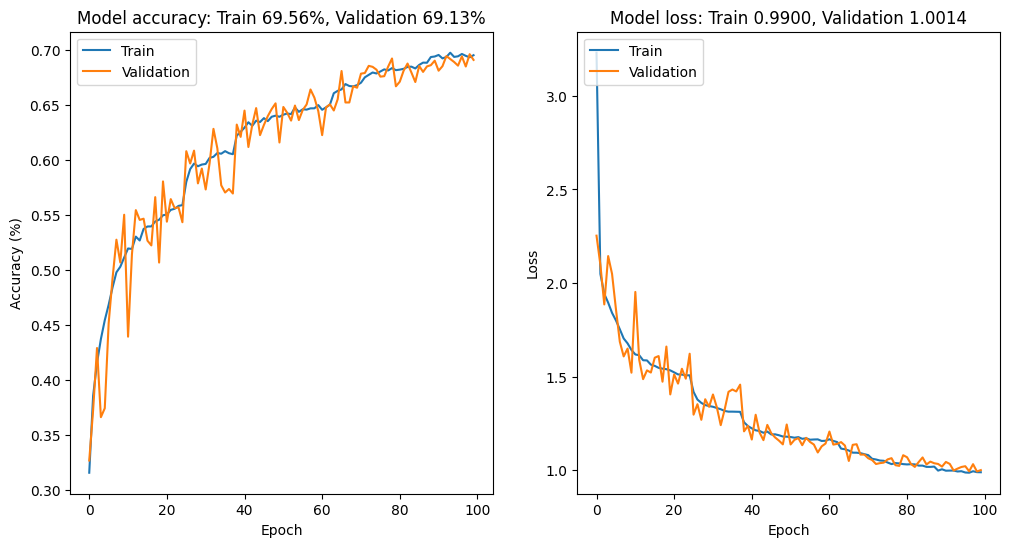

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

The AlexNet model, after applying Data Augmentation and Learning Rate Scheduling, has shown a significant improvement in generalization ability. After 100 epochs, the accuracy on the training set reached 69.12%, and on the test set, it was 69.13%, with a negligible difference between the two, indicating that overfitting has been substantially reduced. The loss value also demonstrated greater stability across epochs, with the final loss on the test set being 1.0014. These results suggest that the model has gradually converged and achieved a good balance between accuracy and generalization.

To further refine the model’s performance, I plan to increase the batch size from 64 to 128 and extend the patience parameter in early stopping from 15 to 20. This adjustment is motivated by the need to ensure smoother convergence and potentially uncover a better local minimum. A larger batch size will allow for more stable gradient updates, which can reduce fluctuations during training, while increased patience will give the model more opportunities to improve before stopping, especially as it approaches convergence.

#Optimizing AlexNet Performance: Increasing Batch Size to 128 and Early Stopping Patience to 20 for Enhanced Convergence

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization and L2 Regularization
    model.add(Conv2D(96, (3, 3), strides=(4, 4), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

# Create the AlexNet model
alexnet = create_alexnet()
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the model with data augmentation and callbacks
history_alexnet = alexnet.fit(
    datagen.flow(x_train, y_cat_train, batch_size=128),
    epochs=100,
    validation_data=(x_test, y_cat_test),
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100
  4/391 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.0952 - loss: 10.4232 

W0000 00:00:1723879169.382251     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


234/391 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.2505 - loss: 6.1007

W0000 00:00:1723879191.079195     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 91ms/step - accuracy: 0.2812 - loss: 5.2712 - val_accuracy: 0.1920 - val_loss: 2.9733 - learning_rate: 0.0010
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.4240 - loss: 2.1297 - val_accuracy: 0.3921 - val_loss: 2.2146 - learning_rate: 0.0010
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.4596 - loss: 1.8745 - val_accuracy: 0.4562 - val_loss: 1.8289 - learning_rate: 0.0010
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.4795 - loss: 1.7911 - val_accuracy: 0.4472 - val_loss: 1.9645 - learning_rate: 0.0010
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.4855 - loss: 1.7645 - val_accuracy: 0.5036 - val_loss: 1.7192 - learning_rate: 0.0010
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.5040 - loss: 1.7213 - val_accuracy: 0.4894 - val_loss: 1.7325 - learning_rate: 0.0010
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.5085 - loss: 

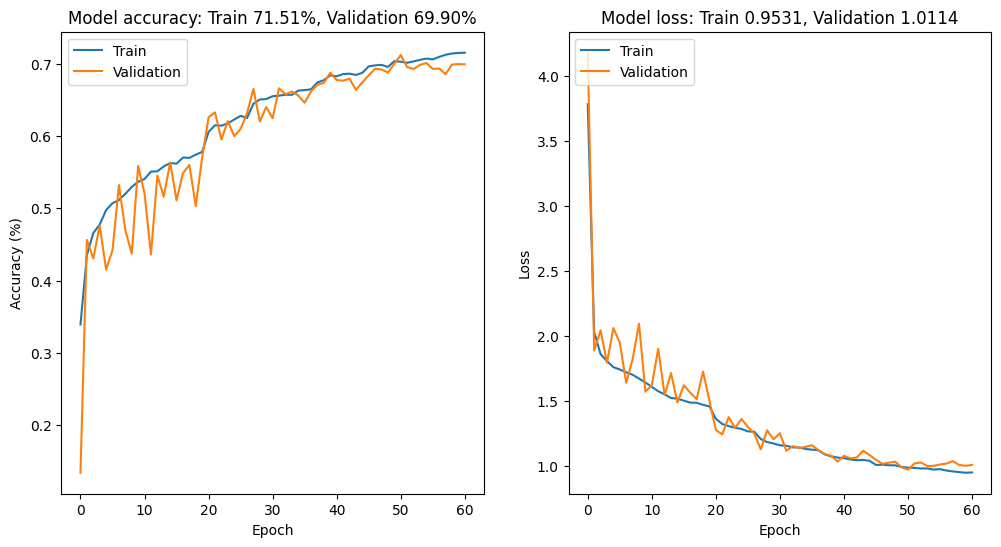

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization and L2 Regularization
    model.add(Conv2D(96, (3, 3), strides=(4, 4), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

# Create the AlexNet model
alexnet = create_alexnet()
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the model with data augmentation and callbacks
history_alexnet = alexnet.fit(
    datagen.flow(x_train, y_cat_train, batch_size=128),
    epochs=100,
    validation_data=(x_test, y_cat_test),
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.2696 - loss: 4.1043 - val_accuracy: 0.1751 - val_loss: 3.4782 - learning_rate: 0.0010
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 87ms/step - accuracy: 0.4234 - loss: 2.3232 - val_accuracy: 0.3194 - val_loss: 2.3184 - learning_rate: 0.0010
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.4561 - loss: 1.9379 - val_accuracy: 0.4337 - val_loss: 1.9179 - learning_rate: 0.0010
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.4803 - loss: 1.8117 - val_accuracy: 0.3871 - val_loss: 2.0996 - learning_rate: 0.0010
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.4918 - loss: 1.7680 - val_accuracy: 0.4125 - val_loss: 2.0223 - learning_rate: 0.0010
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 87ms/step - accuracy: 0.4992 - loss: 1.7446 - val_accuracy: 0.3943 - val_loss: 1.9975 - learning_rate: 0.0010
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.

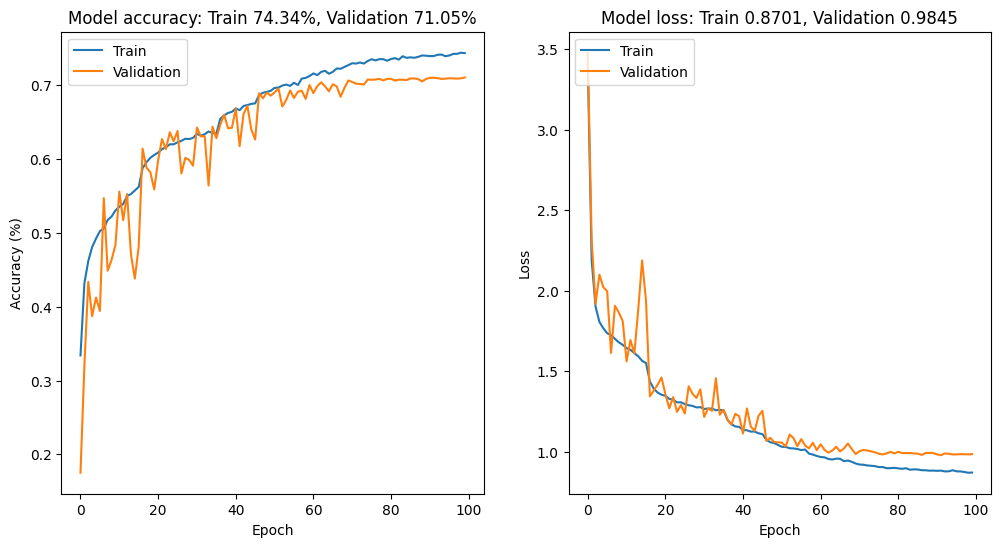

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization and L2 Regularization
    model.add(Conv2D(96, (3, 3), strides=(4, 4), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

# Create the AlexNet model
alexnet = create_alexnet()
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

alexnet.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the model with data augmentation and callbacks
history_alexnet = alexnet.fit(
    datagen.flow(x_train, y_cat_train, batch_size=128),
    epochs=100,
    validation_data=(x_test, y_cat_test),
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 115ms/step - accuracy: 0.2557 - loss: 4.6048 - val_accuracy: 0.2715 - val_loss: 4.2782 - learning_rate: 0.0100
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.4221 - loss: 3.7773 - val_accuracy: 0.4847 - val_loss: 3.4138 - learning_rate: 0.0100
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.4678 - loss: 3.3760 - val_accuracy: 0.5226 - val_loss: 3.0510 - learning_rate: 0.0100
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.5014 - loss: 3.0438 - val_accuracy: 0.5075 - val_loss: 2.8721 - learning_rate: 0.0100
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.5283 - loss: 2.7705 - val_accuracy: 0.4740 - val_loss: 2.7940 - learning_rate: 0.0100
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.5428 - loss: 2.5468 - val_accuracy: 0.5425 - val_loss: 2.4369 - learning_rate: 0.0100
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.5532 - loss:

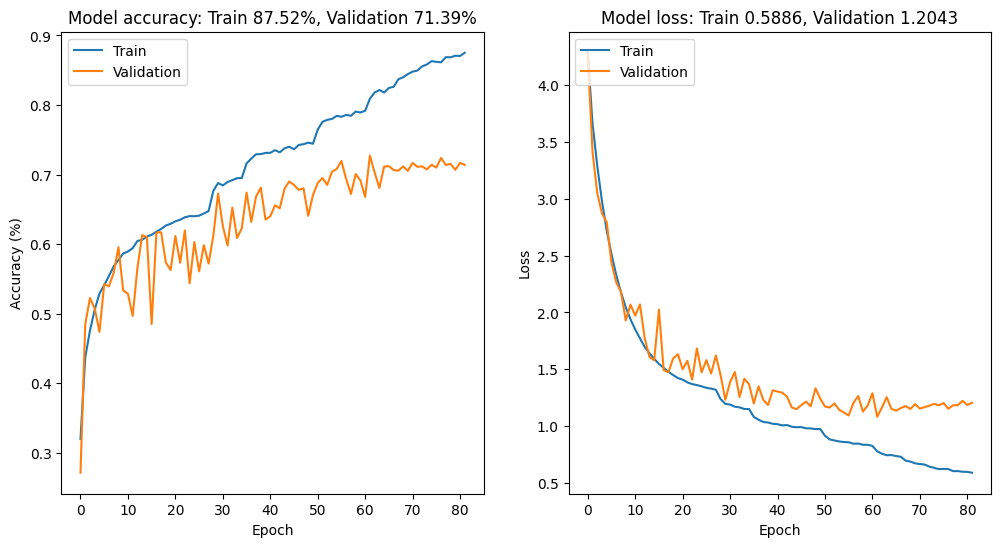

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization and L2 Regularization
    model.add(Conv2D(96, (3, 3), strides=(4, 4), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

# Create the AlexNet model
alexnet = create_alexnet()
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

alexnet.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the model with data augmentation and callbacks
history_alexnet = alexnet.fit(
    datagen.flow(x_train, y_cat_train, batch_size=128),
    epochs=100,
    validation_data=(x_test, y_cat_test),
    callbacks=[reduce_lr, early_stopping]
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 56, 56, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 56, 56, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 28, 28, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 14, 14, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 14, 14, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 14, 14, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 14, 14, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 14, 14, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4096)                │      51,384,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │          40,9

 Total params: 71,927,050 (274.38 MB)

 Trainable params: 71,924,298 (274.37 MB)

 Non-trainable params: 2,752 (10.75 KB)

ValueError: cannot reshape array of size 9 into shape (3,3,3,96)

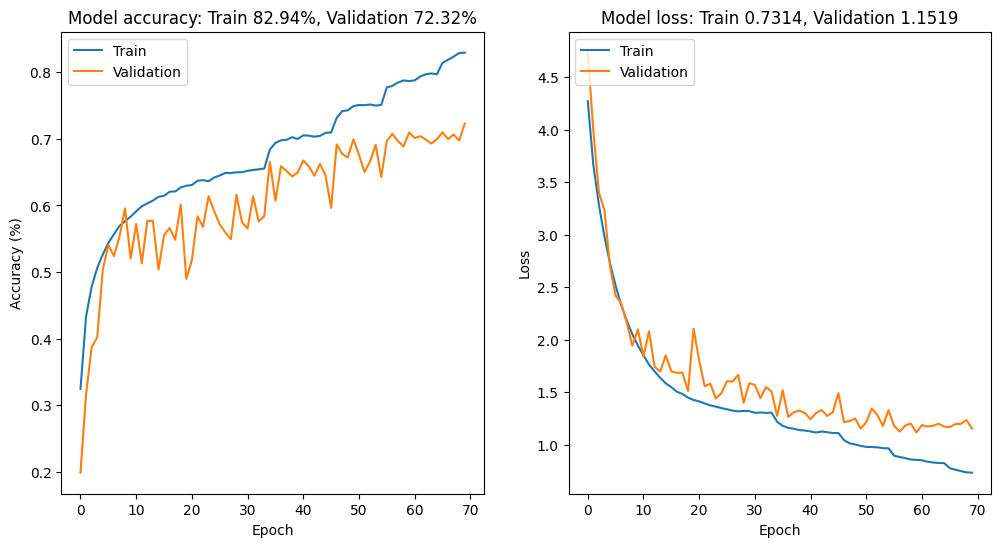

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization and L2 Regularization
    model.add(Conv2D(96, (3, 3), strides=(2, 2), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

# Create the AlexNet model
alexnet = create_alexnet()
sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)  # Giảm learning rate ban đầu

alexnet.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,  # Thêm zoom augmentation
    shear_range=0.2  # Thêm shear augmentation
)

# Fit the model with data augmentation and callbacks
history_alexnet = alexnet.fit(
    datagen.flow(x_train, y_cat_train, batch_size=128),
    epochs=100,
    validation_data=(x_test, y_cat_test),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 128ms/step - accuracy: 0.2004 - loss: 4.3524 - val_accuracy: 0.1868 - val_loss: 4.2145 - learning_rate: 0.0010
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 64s 104ms/step - accuracy: 0.3373 - loss: 3.7583 - val_accuracy: 0.4669 - val_loss: 3.4328 - learning_rate: 0.0010
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.3891 - loss: 3.6011 - val_accuracy: 0.4539 - val_loss: 3.3974 - learning_rate: 0.0010
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.4297 - loss: 3.4700 - val_accuracy: 0.4805 - val_loss: 3.3077 - learning_rate: 0.0010
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.4681 - loss: 3.3585 - val_accuracy: 0.5183 - val_loss: 3.1591 - learning_rate: 0.0010
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.4825 - loss: 3.2823 - val_accuracy: 0.5088 - val_loss: 3.2585 - learning_rate: 0.0010
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.5038 -

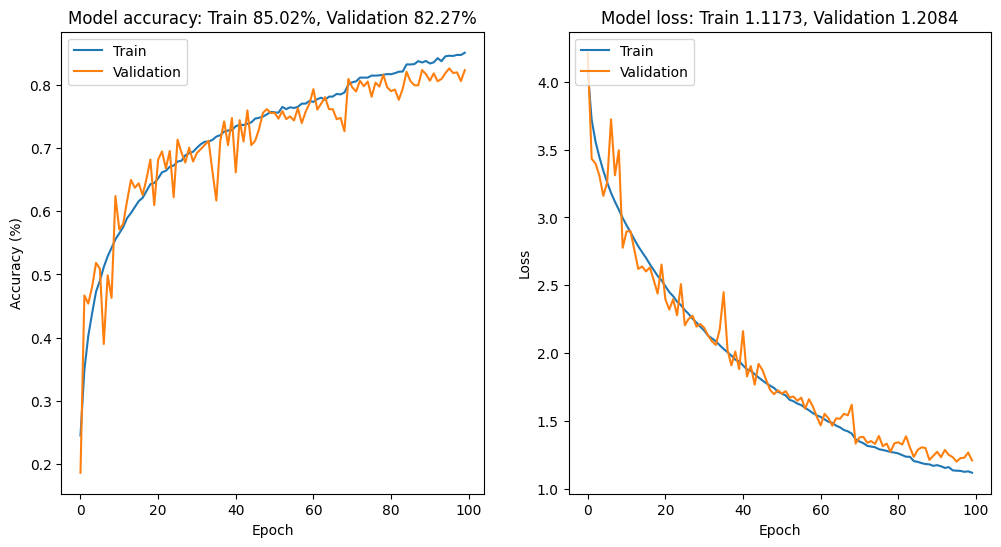

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
def create_alexnet():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    # Convolutional layers with Batch Normalization and L2 Regularization
    model.add(Conv2D(96, (3, 3), strides=(2, 2), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

# Create the AlexNet model
alexnet = create_alexnet()
sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)  # Giảm learning rate ban đầu

alexnet.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,  # Thêm zoom augmentation
    shear_range=0.2  # Thêm shear augmentation
)

# Fit the model with data augmentation and callbacks
history_alexnet = alexnet.fit(
    datagen.flow(x_train, y_cat_train, batch_size=256),
    epochs=150,
    validation_data=(x_test, y_cat_test),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/150
196/196 ━━━━━━━━━━━━━━━━━━━━ 49s 211ms/step - accuracy: 0.1874 - loss: 4.5241 - val_accuracy: 0.1141 - val_loss: 4.3967 - learning_rate: 0.0010
Epoch 2/150
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 187ms/step - accuracy: 0.3002 - loss: 3.8823 - val_accuracy: 0.1680 - val_loss: 4.2285 - learning_rate: 0.0010
Epoch 3/150
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 197ms/step - accuracy: 0.3566 - loss: 3.7171 - val_accuracy: 0.4446 - val_loss: 3.5465 - learning_rate: 0.0010
Epoch 4/150
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 193ms/step - accuracy: 0.3873 - loss: 3.6202 - val_accuracy: 0.4416 - val_loss: 3.4592 - learning_rate: 0.0010
Epoch 5/150
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - accuracy: 0.4170 - loss: 3.5305 - val_accuracy: 0.4382 - val_loss: 3.4574 - learning_rate: 0.0010
Epoch 6/150
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 197ms/step - accuracy: 0.4453 - loss: 3.4627 - val_accuracy: 0.4843 - val_loss: 3.3422 - learning_rate: 0.0010
Epoch 7/150
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - accura

In [ ]:
final_train_accuracy = history_alexnet.history['accuracy'][-1] * 100
final_val_accuracy = history_alexnet.history['val_accuracy'][-1] * 100
final_train_loss = history_alexnet.history['loss'][-1]
final_val_loss = history_alexnet.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
test_loss, test_accuracy = alexnet.evaluate(x_test, y_cat_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8729 - loss: 0.8882
Test Loss: 0.9056459665298462
Test Accuracy: 0.8709999918937683


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


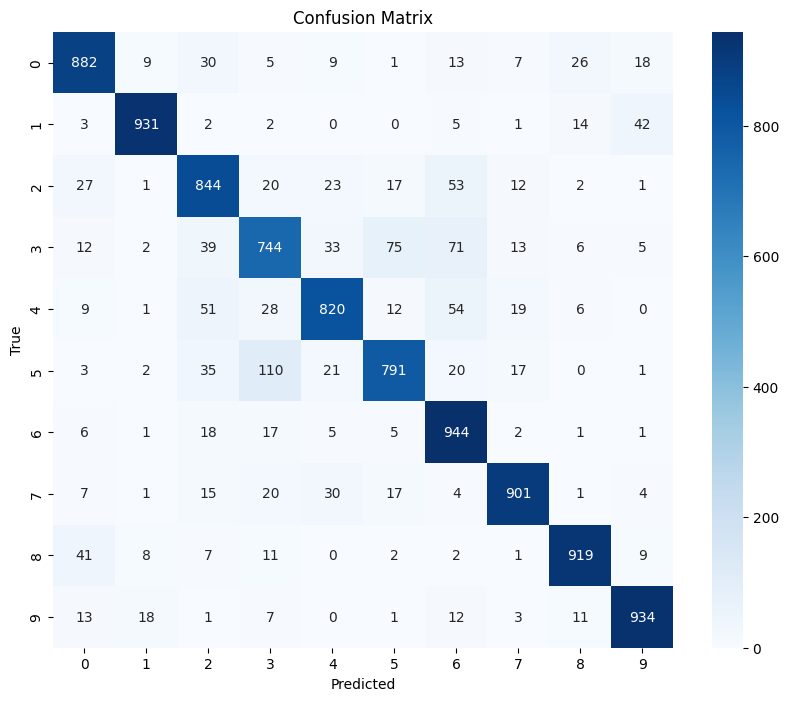

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       0.96      0.93      0.94      1000
           2       0.81      0.84      0.83      1000
           3       0.77      0.74      0.76      1000
           4       0.87      0.82      0.84      1000
           5       0.86      0.79      0.82      1000
           6       0.80      0.94      0.87      1000
           7       0.92      0.90      0.91      1000
           8       0.93      0.92      0.93      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
y_pred = alexnet.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_cat_test, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


NameError: name 'labels' is not defined

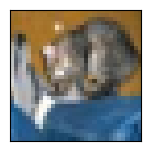

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Generate predictions
predictions = alexnet.predict(x_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

**VGG**

In [ ]:
vgg16 = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train mô hình
history = model.fit(x_train, y_cat_train, epochs=100,
                    validation_data=(x_test, y_cat_test),
                    batch_size=64)

In [ ]:
final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
vgg16 = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping để dừng sớm khi mô hình không cải thiện
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(x_train, y_cat_train, epochs=100,
                    validation_data=(x_test, y_cat_test),
                    batch_size=64,
                    callbacks=[early_stopping])

In [ ]:
final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
vgg16 = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))

# Unfreeze một số lớp cuối của VGG16
for layer in vgg16.layers[-4:]:
    layer.trainable = True

model = Sequential([
    vgg16,
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile mô hình
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Chuẩn bị callbacks
mc = ModelCheckpoint('./best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Huấn luyện mô hình
batch_size = 64
steps_per_epoch = len(x_train) // batch_size
history = model.fit(
    datagen.flow(x_train, y_cat_train, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=(x_test, y_cat_test),
    callbacks=[early_stopping, mc, reduce_lr]
)


In [ ]:
final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'Model accuracy: Train {final_train_accuracy:.2f}%, Validation {final_val_accuracy:.2f}%')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss: Train {final_train_loss:.4f}, Validation {final_val_loss:.4f}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_cat_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9105 - loss: 0.3289
Test Loss: 0.3387776017189026
Test Accuracy: 0.9065999984741211


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


W0000 00:00:1723835741.240136     337 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


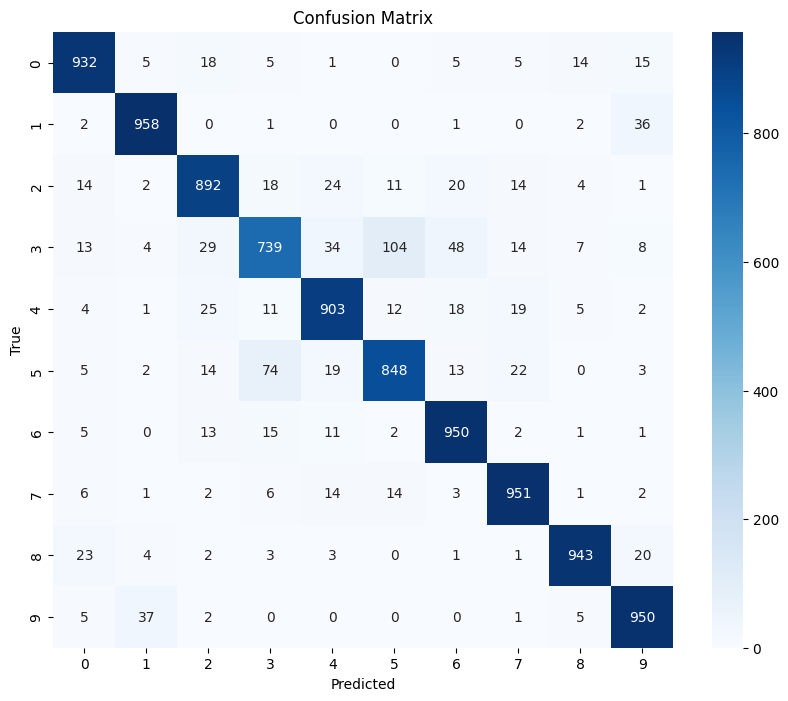

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1000
           1       0.94      0.96      0.95      1000
           2       0.89      0.89      0.89      1000
           3       0.85      0.74      0.79      1000
           4       0.89      0.90      0.90      1000
           5       0.86      0.85      0.85      1000
           6       0.90      0.95      0.92      1000
           7       0.92      0.95      0.94      1000
           8       0.96      0.94      0.95      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_cat_test, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


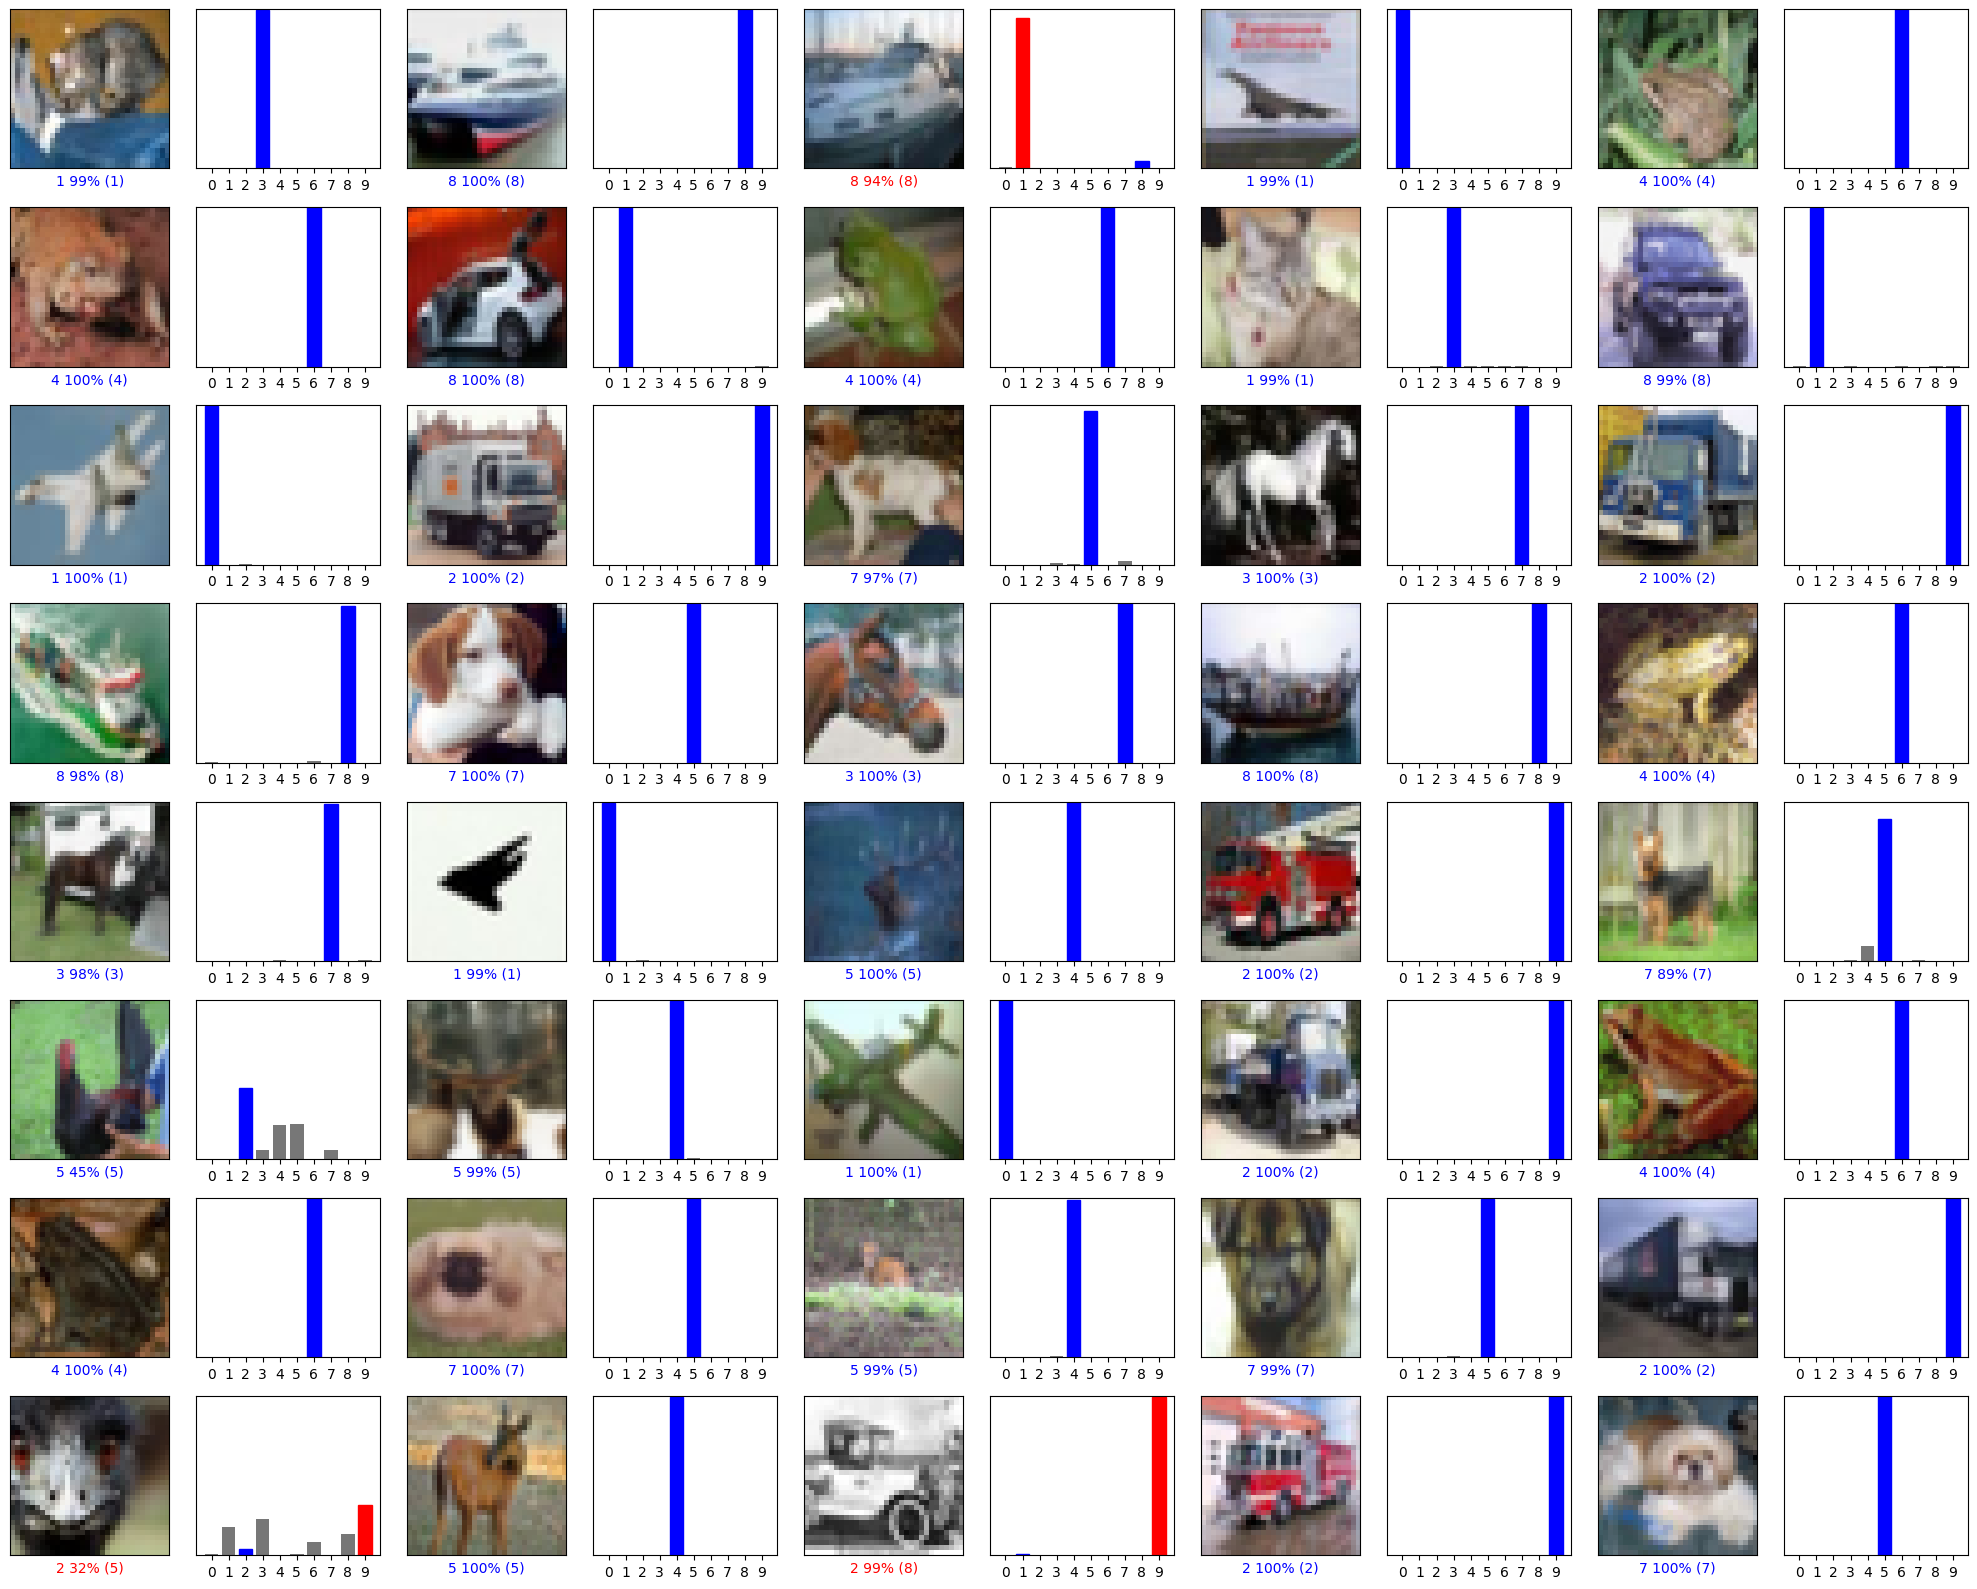

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Generate predictions
predictions = model.predict(x_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()